# se2dr Fig 2 and 5 plot compound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *


In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [3]:
xx = np.linspace(-1.e4, 1.e4, 6001)

HorizontalZeroSDF = ZeroLevelSet(xx,Tiltfunc(xx, theta = 0), Tiltfunc_der(xx, theta = 0), "Horizontal SDF")
TiltedZeroSDF     = ZeroLevelSet(xx,Tiltfunc(xx, theta = 20*np.pi/180), Tiltfunc_der(xx, theta = 20*np.pi/180), "Tilted 20deg SDF")
SigmZeroSDF       = ZeroLevelSet(xx,func(xx),func_der(xx), "Sigmoid SDF")


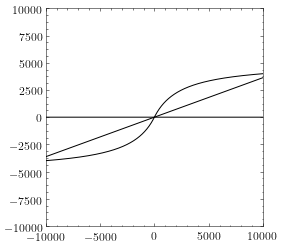

In [4]:
HorizontalZeroSDF.PlotZeroLevelSet()
TiltedZeroSDF.PlotZeroLevelSet()
SigmZeroSDF.PlotZeroLevelSet()

plt.xlim([-10000,10000])
plt.ylim([-10000,10000])
plt.gca().set_aspect('equal', adjustable='box')

# Colormap selection

In [5]:
from palettable.colorbrewer.diverging import PuOr_10 as ElColor

cmap = ElColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5

cmapProf = ListedColormap(Safe_5.mpl_colors[:])

# Extract the information for the profiles

## First the reference

In [6]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-0.txt", "0km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

pathTPV = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

# Reference saved into a list of objects

RefListTPV =  [TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-0.0e+00.txt", "0km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]


# Now select the time snapshot of interest

In [7]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_T0_P3_25x25_1/"


i=8180
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)

In [8]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]
l

['8180']

# Extract the fields for velocity and displacement in each component

In [9]:
TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

/home/nico/miniconda3/envs/jane/lib/python3.5/site-packages/matplotlib/gridspec.py:335: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


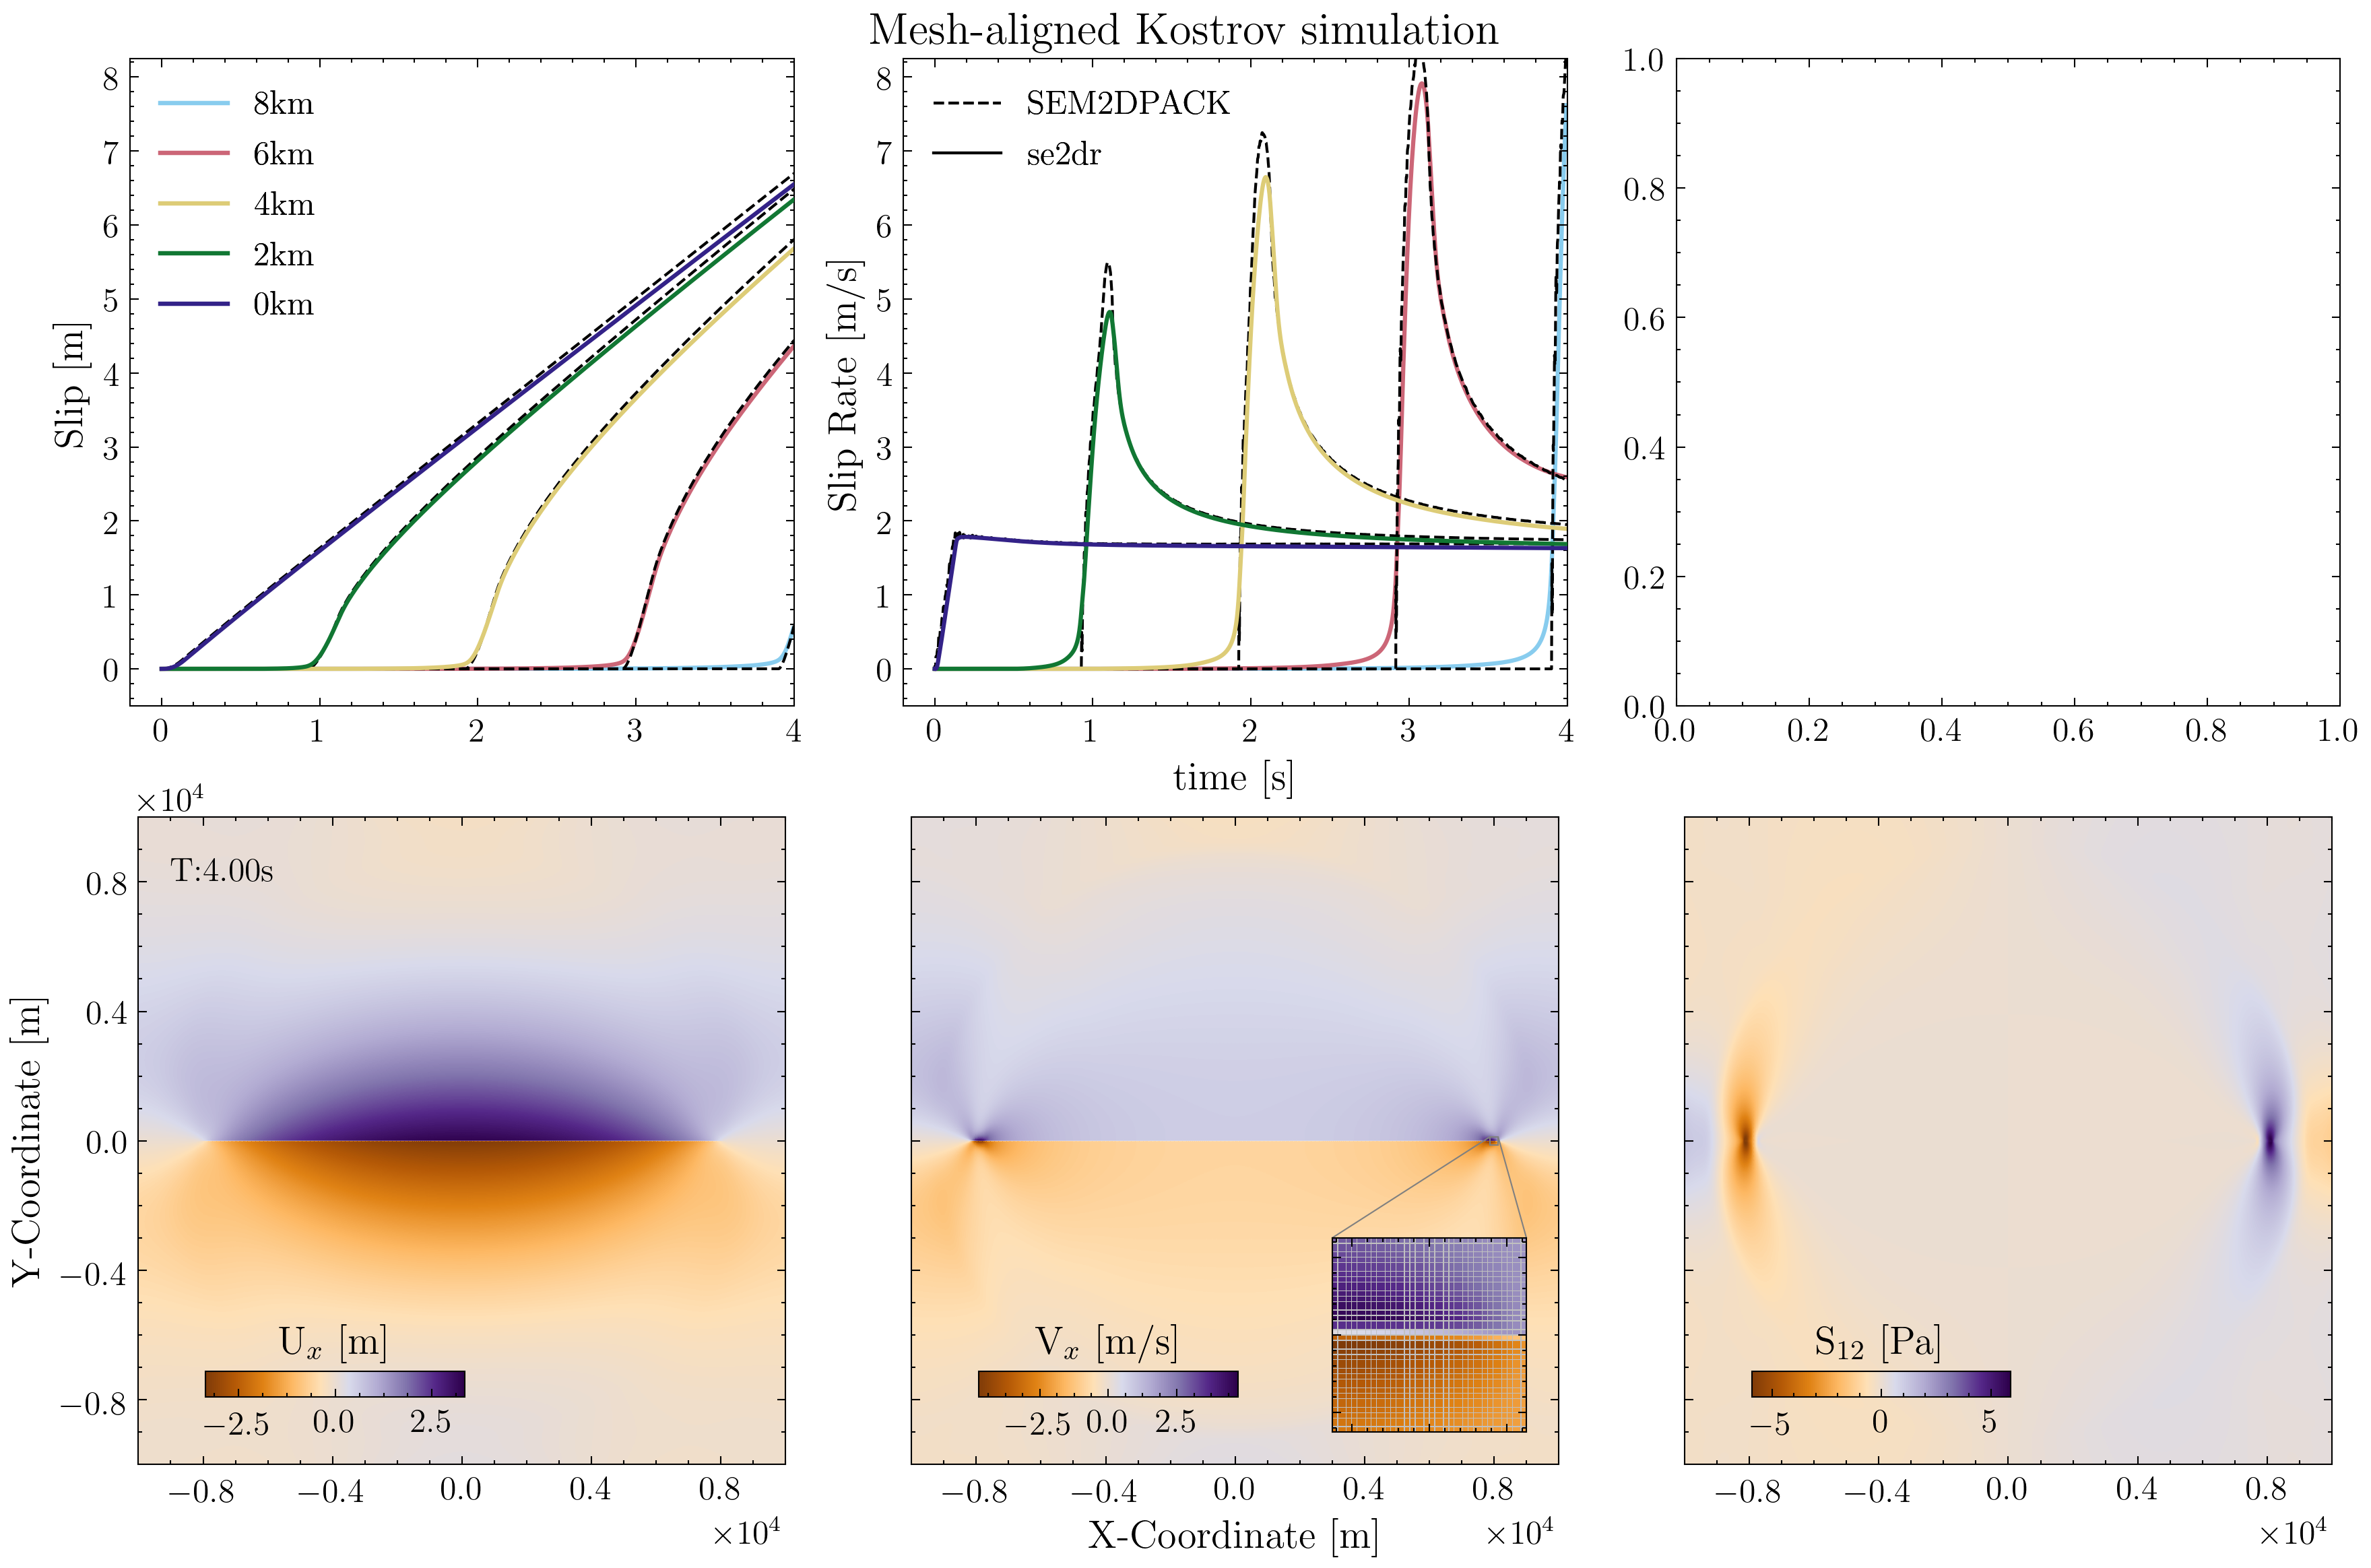

In [10]:
FolderTiltedPath = "/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/DataToPlot/NewBatch-20211015/"
ZeroTiltp3h25 = LoadPickleFile(Filename = "Fin_Kos_T0_P3_025x025_d1_tanh12ph65-Tilt0.0-P3-TPList_t8170_d25.pickle",FolderPath = FolderTiltedPath)

F1, ax = PlotFullSetup(LCoorX, LCoorY, LFieldX, LFieldvelX, LFieldvelY, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,[8000-125,8000+125,-125,125],
            cmap=cmap)

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(ZeroTiltp3h25):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 

LabelsPerColor= ["25x25 - P3 - $\delta$50."]

F1.suptitle("Mesh-aligned Kostrov simulation")
[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]

formatGivenAxes(ax[:2],inverted=True)



# figure 3 tilted

In [11]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_T20_P3_25x25_d2.5/"


i=8180
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)



In [12]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]
l

['8180']

In [13]:
TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

/home/nico/miniconda3/envs/jane/lib/python3.5/site-packages/matplotlib/gridspec.py:335: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


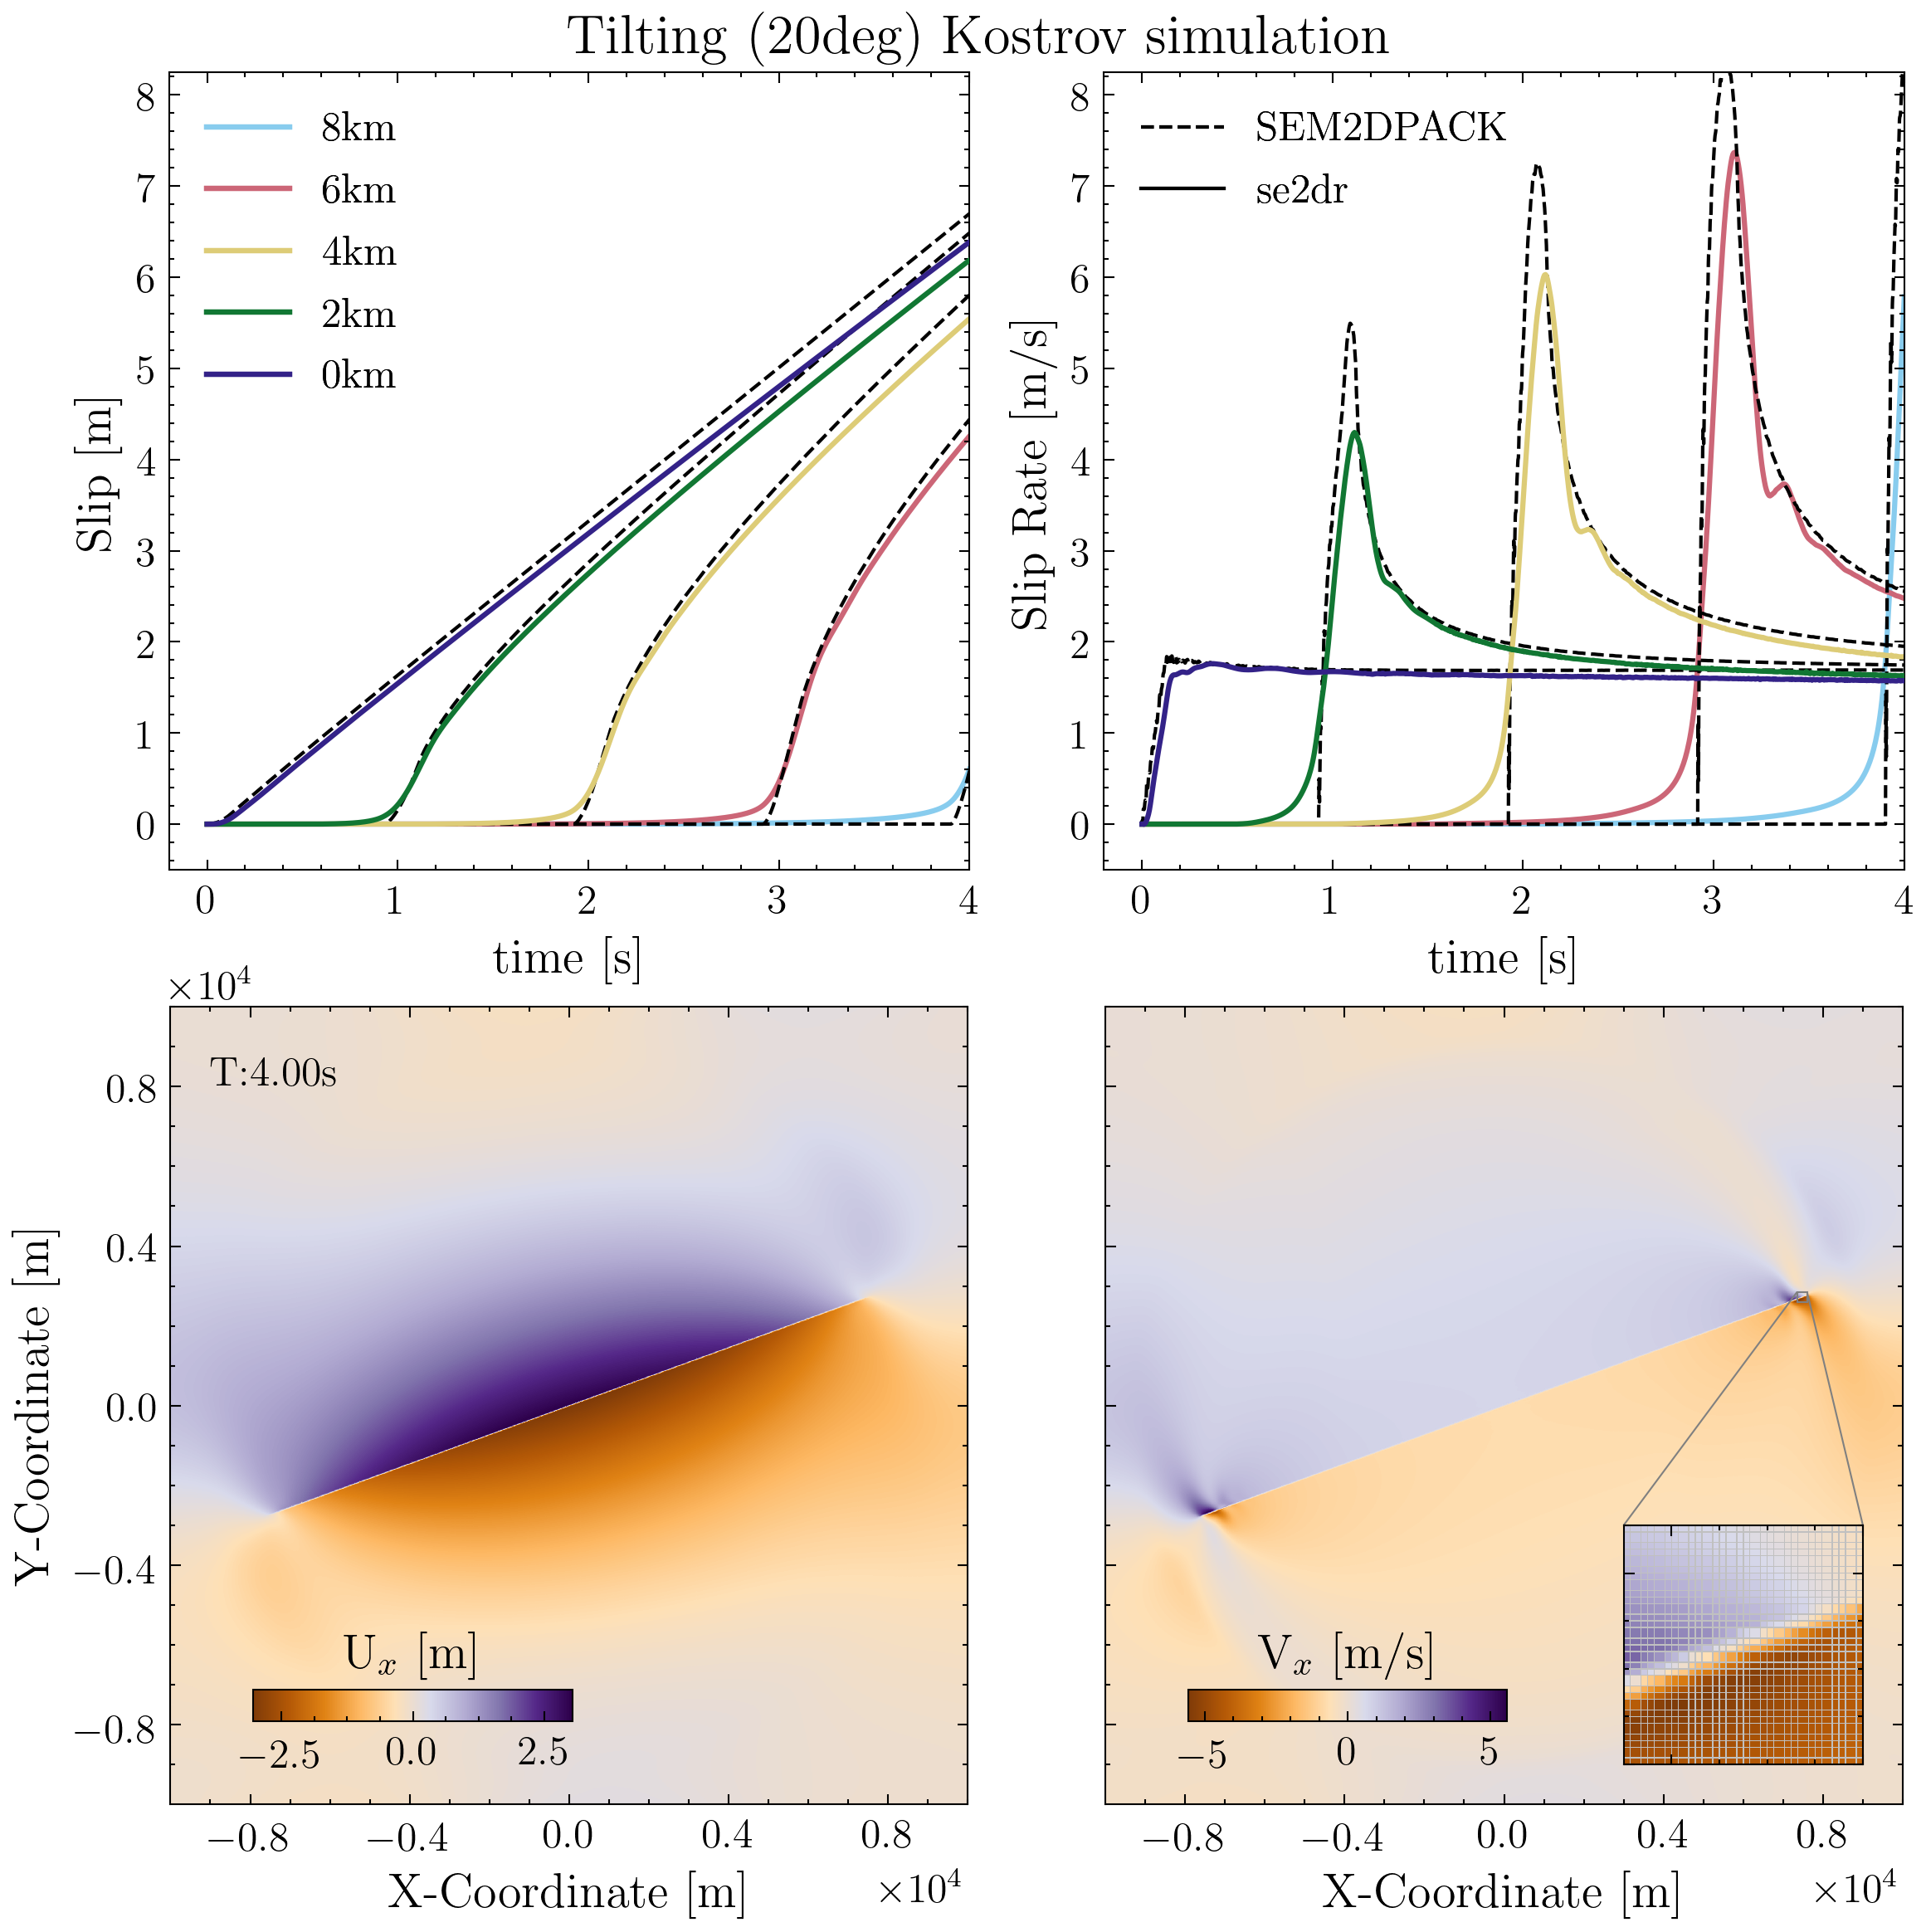

In [14]:
FolderTiltedPath = "/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/DataToPlot/NewBatch-20211019/"
DataProfile = LoadPickleFile(Filename = "TEAR_Kos_T20_P3_025x025_d2.5_tanh12ph65-Tilt20.0-P3-TPList_t8180_d62.5.pickle",FolderPath = FolderTiltedPath)

x0,y0 = 7350,2600
InsetAxis = [x0,x0+250,y0,y0+250]
F1, ax = Plot4KomaSetup(LCoorX, LCoorY, LFieldX, LFieldvelX, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,InsetAxis,
            cmap=cmap)
del x0,y0,InsetAxis


# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(DataProfile):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 


ax[0].set_xlabel("time [s]")

F1.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]

formatGivenAxes(ax[:2],inverted=True)




# Figure 4 Sigmoid

In [15]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_Sig_P3_25x25_2.5/"


i=7890
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)



In [16]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]
l

['7890']

In [17]:
TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

/home/nico/miniconda3/envs/jane/lib/python3.5/site-packages/matplotlib/gridspec.py:335: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


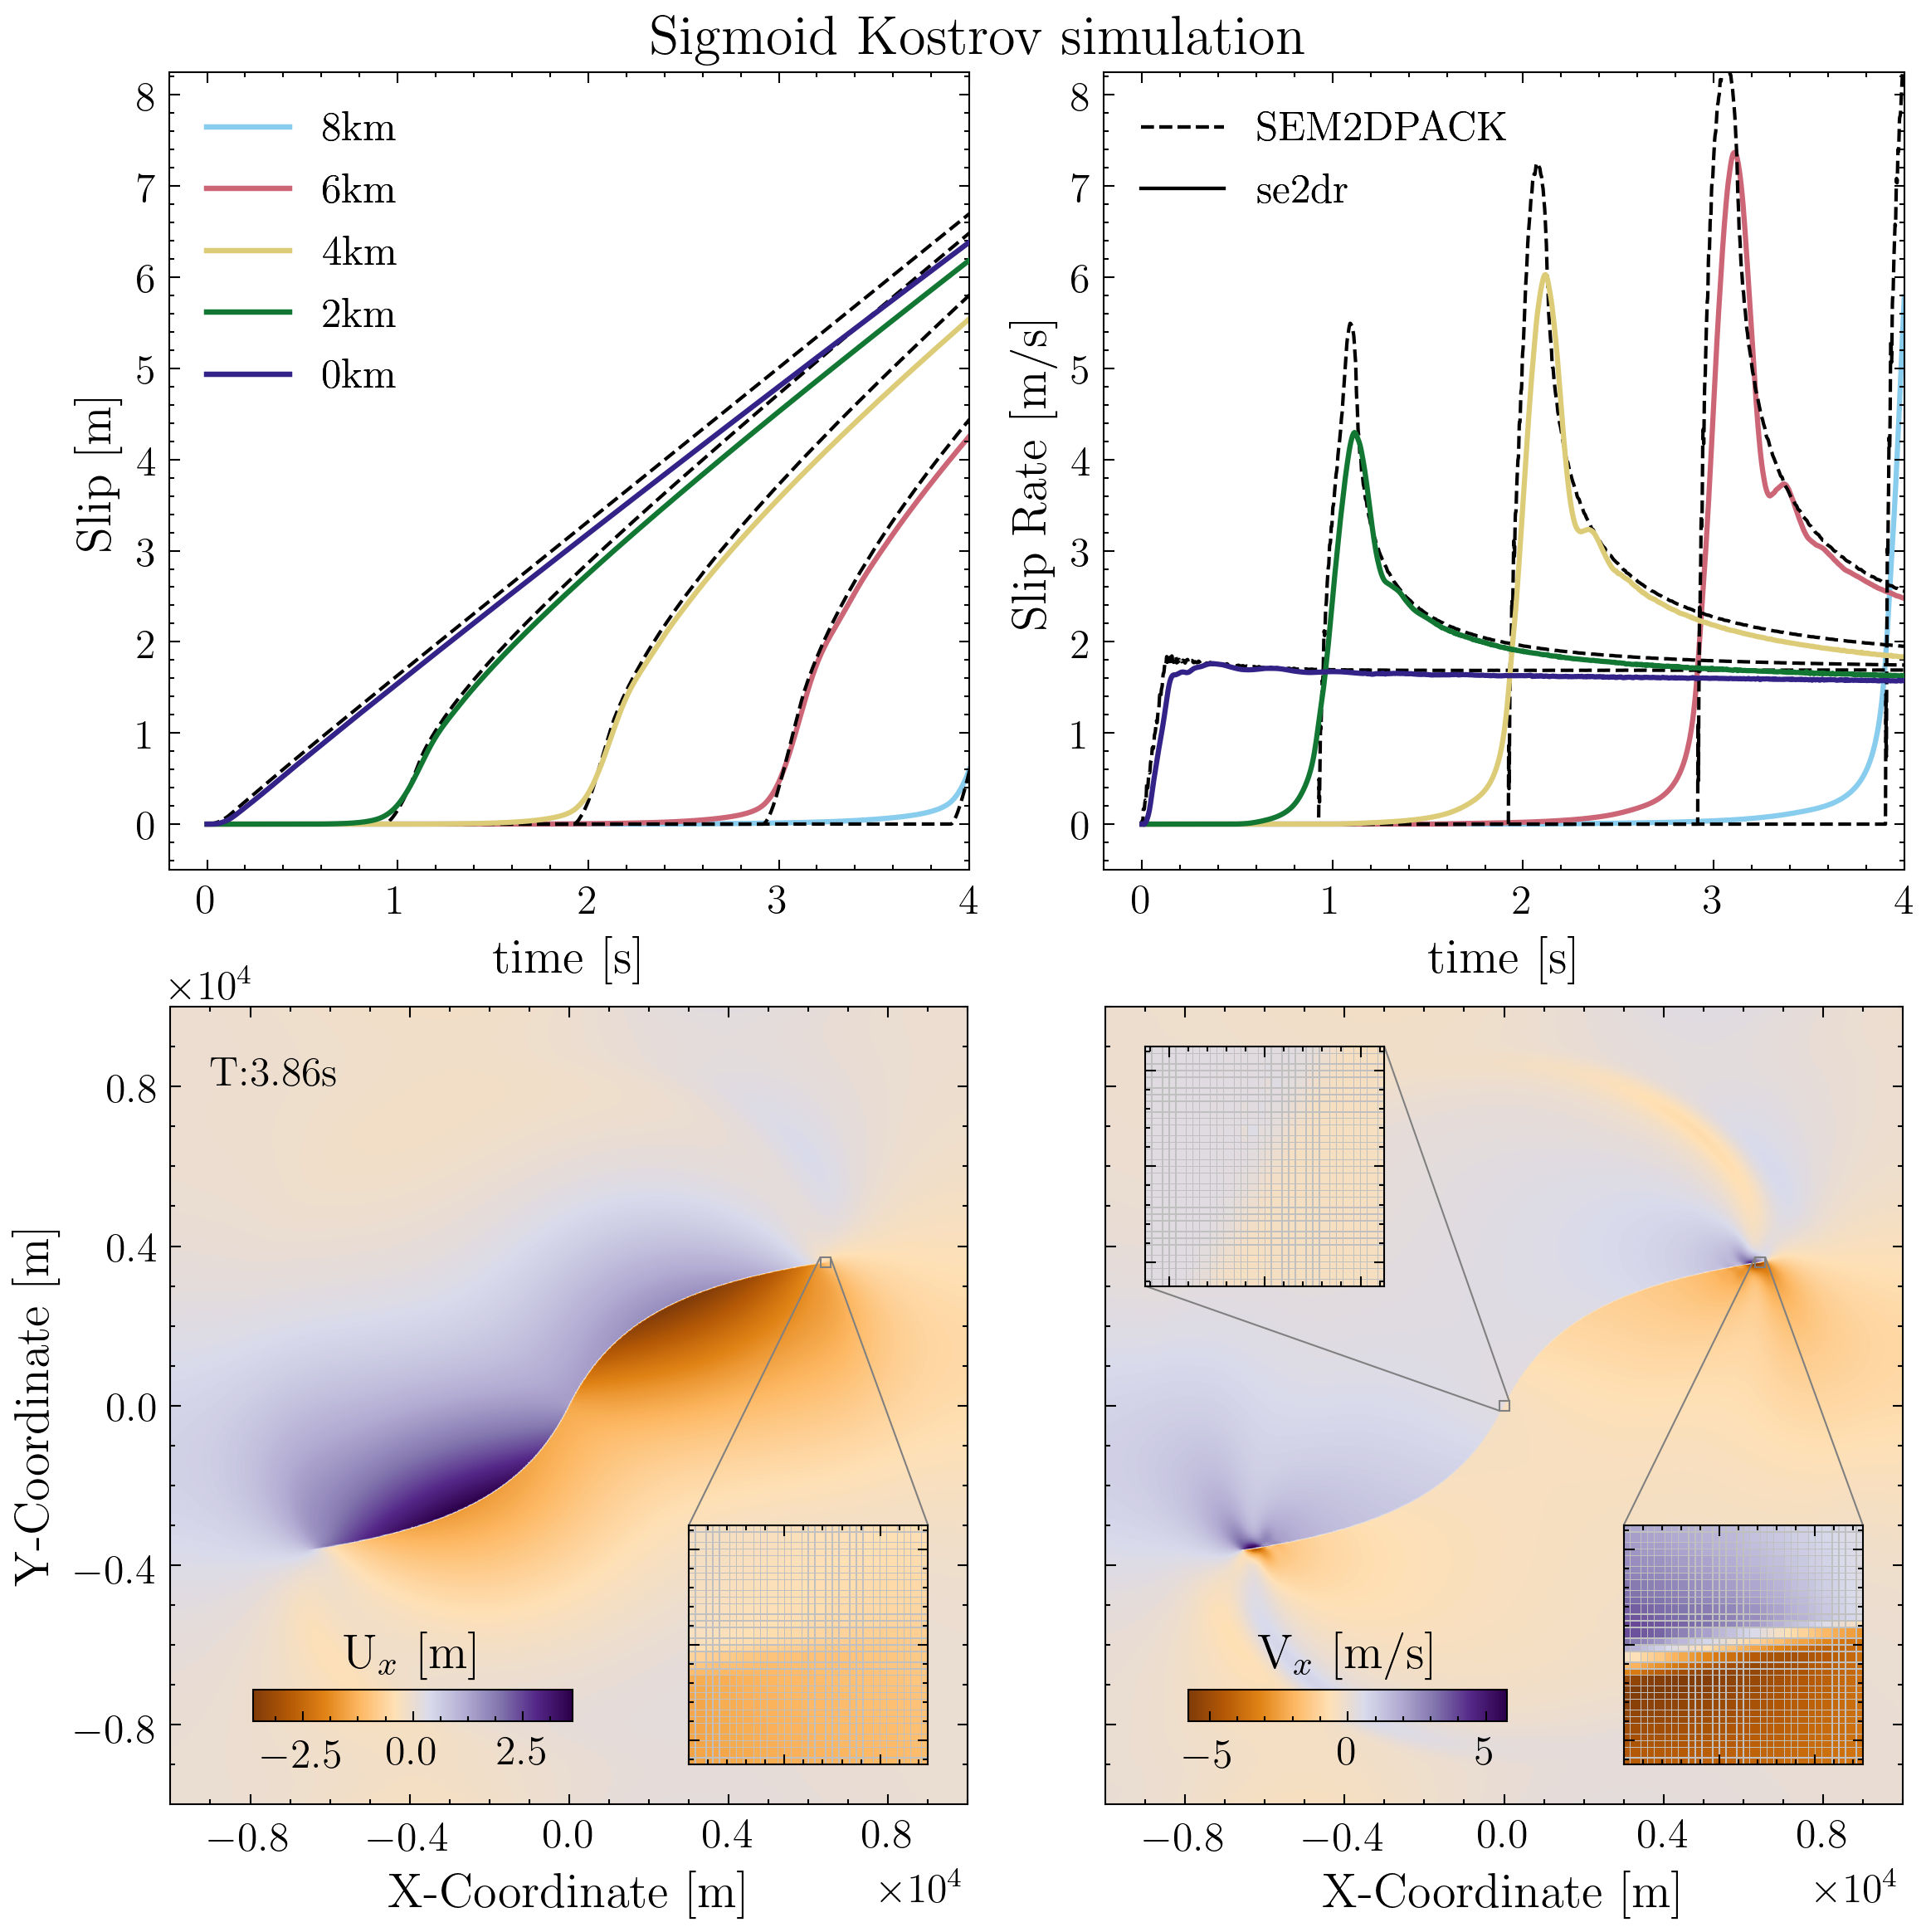

In [18]:
FolderTiltedPath = "/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/DataToPlot/NewBatch-20211019/"
DataProfile = LoadPickleFile(Filename = "TEAR_Kos_T20_P3_025x025_d2.5_tanh12ph65-Tilt20.0-P3-TPList_t8180_d62.5.pickle",FolderPath = FolderTiltedPath)

x0,y0 = 6300,3475
InsetAxis = [x0,x0+250,y0,y0+250]

F1, ax = PlotF4Setup(LCoorX, LCoorY, LFieldX, LFieldvelX, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,InsetAxis,
            cmap=cmap)
del x0,y0,InsetAxis
# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(DataProfile):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 


ax[0].set_xlabel("time [s]")

F1.suptitle("Sigmoid Kostrov simulation")
[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]

formatGivenAxes(ax[:2],inverted=True)



In [19]:
fname = "Sigma-Aligned-step-{timestep:04}.vtu"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_T0_P3_25x25_1/"

i=8180